# Vehicle Loan Prediction Machine Learning Model

# Chapter 2 - Load and Clean the Data

## Lesson 1 - Getting Started

In this lesson, we will import the required libraries and load the data!

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Loading the Data

- Our vehicle loan data is provided in csv format 
- We can load it into python as a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) with [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
- Each loan in our dataset has a UNIQUEID which we will use as the row index

First, let's use pandas to load our loan data and store it in a variable called loan_df

- Replace ‘../data/vehicle_loans.csv’ with your local file path and name

In [2]:
#Load data
df = pd.read_csv("../data/vehicle_loans.csv", index_col='UNIQUEID')
df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


We can use [df.head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) to get the first n rows from a DataFrame

- defaults to bring out the first 5 rows

In [3]:
#get loan_df head
df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


## Lesson 2 - First Look

Now that we have loaded the data, let's take a closer Look

### Rows and Columns

- How many data points do we have?
- How many attributes are there?
- We can get the dimensions of our DataFrame using [df.shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)

In [4]:
#Investigate shape
df.shape

(233154, 40)

- The shape property of a dataframe contains a tuple with the dimensions of the dataframe
- A tuple is an ordered immutable (unchangeable) collection 
- Tuple elements can be accessed using indexes, like lists

In [5]:
#print rows and cols
print("Rows are: ", format(df.shape[0]))
print("Columns are:", format(df.shape[1]))

Rows are:  233154
Columns are: 40


Ok, so we have 233154 data points each with 40 variables


### Variable Types

- Before we go any further it is important to understand the type of data stored in our columns
- Pandas [df.info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) shows us both the data type and the not null count for each column


In [6]:
#Look at column types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     233154 non-null  int64  
 1   ASSET_COST                           233154 non-null  int64  
 2   LTV                                  233154 non-null  float64
 3   BRANCH_ID                            233154 non-null  int64  
 4   SUPPLIER_ID                          233154 non-null  int64  
 5   MANUFACTURER_ID                      233154 non-null  int64  
 6   CURRENT_PINCODE_ID                   233154 non-null  int64  
 7   DATE_OF_BIRTH                        233154 non-null  object 
 8   EMPLOYMENT_TYPE                      225493 non-null  object 
 9   DISBURSAL_DATE                       233154 non-null  object 
 10  STATE_ID                             233154 non-null  int64  
 11  EMPLOYEE

Now we know we have 3 data types:
- int64 (whole number)
- float64 (floating point number)
- object (string or non-numeric)

Straight away there are some interesting things,

DATE_OF_BIRTH, EMPLOYMENT_TYPE, DISBURSAL_DATE, PERFORM_CNS_SCORE_DESCRIPTION, AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH are all object data types, meaning they contain non-numeric values such as strings or dates. 

EMPLOYMENT_TYPE has some missing values


### Date Range

DISBURSAL_DATE contains the date the agreed loan amount was transferred to the applicant, let's use it to get an idea of the timeframe covered by the data 

The first step is to convert DISBURSAL_DATE to a datetime
- We can use [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to convert an entire column to datetime 



In [7]:
#convert disbursal date
df['DISBURSAL_DATE'] = pd.to_datetime(df['DISBURSAL_DATE'])

C:\Users\LUGAPEDE\AppData\Roaming\Python\Python39\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LUGAPEDE\AppData\Roaming\Python\Python39\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-10-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LUGAPEDE\AppData\Roaming\Python\Python39\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LUGAPEDE\AppData\Roaming\Python\Python39\site-packages\pandas\core\tools\datetimes.py:10

Now we can use [min](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.min.html) and [max] to look for the first and last loan disbursals in our data

In [8]:
#get minimum and maximum date
print("Maximum date {}".format(df["DISBURSAL_DATE"].max()))
print("Minimum date {}".format(df["DISBURSAL_DATE"].min()))

Maximum date 2018-12-10 00:00:00
Minimum date 2018-01-08 00:00:00


We can do mathematical operations on datetimes to get the difference in days

In [9]:
#print timespan
df["DISBURSAL_DATE"].max() - df["DISBURSAL_DATE"].min()

Timedelta('336 days 00:00:00')

### Now we know

- Our dataset has information for 233154 loans 
- There are 40 variables 
- The data covers loans over 336 days between January and December 2018

More detailed exploratory analysis will be covered in the next chapter

For now, let's move on to look at what we are actually trying to predict

## Lesson 3 - Target Variable

### What is the target variable?

- Variable we are trying to predict
- LOAN_DEFAULT is our target variable so lets investigate it further


### Explore the Target Variable
- How many people defaulted on their loans?
- To count the frequency of unique values in a dataframe column we can use [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)

<AxesSubplot:>

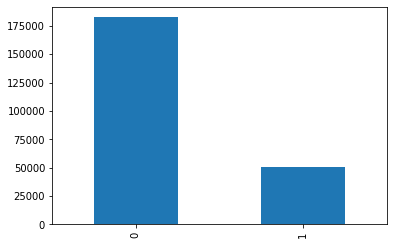

In [10]:
#look at LOAN_DEFAULT
df['LOAN_DEFAULT'].value_counts().plot(kind = "bar")

Great! We can see that out of our 233154 loans, there are 50611 which defaulted

The 'normalize' parameter lets us use value_counts to get a percentage

In [11]:
#look at LOAN_DEFAULT normalized
df['LOAN_DEFAULT'].value_counts(normalize=True)

0    0.782929
1    0.217071
Name: LOAN_DEFAULT, dtype: float64

The rate of defaulted loans is about 21.7% keep this in mind!

### Visualize the Target Variable

Just for good measure lets visualize our target variable using the [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) function from seaborn

<AxesSubplot:xlabel='LOAN_DEFAULT', ylabel='count'>

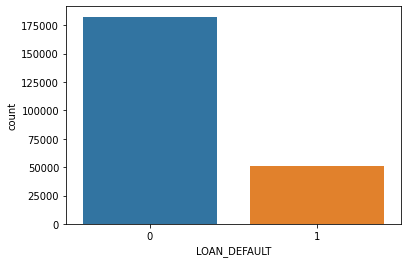

In [12]:
#plot loan default
sns.countplot(data = df, x = 'LOAN_DEFAULT')

## Lesson 4 - Missing Values

We saw earlier that our dataset contains some missing values, specifically for the EMPLOYMENT_TYPE column.

### Identifying Missing Data

Time to investigate what we saw earlier by identifying the columns with missing values

Using [df.isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) we can find those columns which have at least one null value


In [13]:
#get cells with missing values
df.apply(lambda x:sum(x.isnull()))

DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS               

[df.isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) outputs a DataFrame with a boolean value in each cell indicating the presence of a null value

We can combine [df.isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) with [df.any](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html) to get a list of all columns with at least one missing value

In [14]:
#get columns with missing values
df.isnull().any()

DISBURSED_AMOUNT                       False
ASSET_COST                             False
LTV                                    False
BRANCH_ID                              False
SUPPLIER_ID                            False
MANUFACTURER_ID                        False
CURRENT_PINCODE_ID                     False
DATE_OF_BIRTH                          False
EMPLOYMENT_TYPE                         True
DISBURSAL_DATE                         False
STATE_ID                               False
EMPLOYEE_CODE_ID                       False
MOBILENO_AVL_FLAG                      False
AADHAR_FLAG                            False
PAN_FLAG                               False
VOTERID_FLAG                           False
DRIVING_FLAG                           False
PASSPORT_FLAG                          False
PERFORM_CNS_SCORE                      False
PERFORM_CNS_SCORE_DESCRIPTION          False
PRI_NO_OF_ACCTS                        False
PRI_ACTIVE_ACCTS                       False
PRI_OVERDU

As expected, the only column with any null values is EMPLOYMENT_TYPE

Combine [df.isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) with [df.sum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html) to get a count of missing values for all columns

In [ ]:
#get missing value count per column

### Handling Missing Values

Ok, we can see that EMPLOYMENT_TYPE has 7661 missing values so we should take a closer look,

### EXERCISE - Explore EMPLOYMENT_TYPE

- Find out how many unique values are in the column
- Hint: Remember how we used [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) and [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) to explore the target variable

### SOLUTION

<AxesSubplot:>

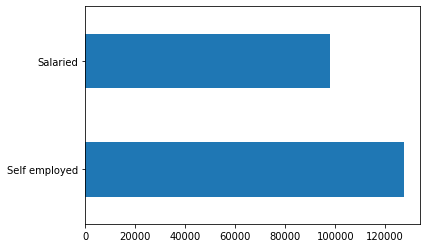

In [15]:
#Type solution here
df['EMPLOYMENT_TYPE'].value_counts().plot(kind = 'barh')

### Handling Missing Values - Continued

Note that EMPLOYMENT_TYPE contains two unique values, 'Salaried' and 'Self Employed'

Since there are relatively few missing values (7661) we can populate them with a placeholder 'Missing' using pandas [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

In [16]:
#Fill missing values
df = df.fillna(value = {'EMPLOYMENT_TYPE': 'MISSING'})

<AxesSubplot:>

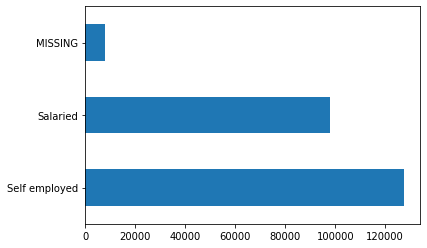

In [17]:
#Plot employment type
df['EMPLOYMENT_TYPE'].value_counts().plot(kind = 'barh')

We can see that the 7661 missing values for employment type have been labelled with the string 'Missing'

## Lesson 5 - Dealing with Dates

- We have two date columns, DISBURSAL_DATE and DATE_OF_BIRTH
- These should be transformed into a more algorithm friendly format

In [18]:
#Print DISBURSAL_DATE and DATE_OF_BIRTH
df[['DISBURSAL_DATE','DATE_OF_BIRTH']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DISBURSAL_DATE  233154 non-null  datetime64[ns]
 1   DATE_OF_BIRTH   233154 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 5.3+ MB


### Calculating Age 

- Intuitively it is fair to assume that age is associated with loan default risk 
- However, we currently do not have a measure of age, only date of birth


### EXERCISE 

- Can you create a new column 'AGE' based on the existing DATE_OF_BIRTH and DISUBURAL_DATE columns
- HINT: use [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to convert from string to datetime

### SOLUTION

In [20]:
#type solution here
df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'])
df["Age"] = df['DISBURSAL_DATE']-df['DATE_OF_BIRTH']
df['Age'] = df['Age']//np.timedelta64(1,'Y')
df.sample(10)

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,Age
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
569900,50683,78682,68.63,11,23984,45,6014,1995-02-02,Self employed,2018-11-10,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,23
515917,45849,60439,78.59,202,23321,86,788,1997-12-07,Salaried,2018-09-18,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1,20
543427,56333,84963,69.44,120,23020,49,6948,1992-01-01,Self employed,2018-09-28,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,26
570453,57259,78306,75.35,152,14622,45,5219,1988-03-24,Self employed,2018-11-10,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,30
515386,44349,62433,73.68,63,18050,86,7093,1985-10-15,Self employed,2018-09-18,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1,32
638154,91770,140435,68.36,29,23510,48,5935,1974-01-20,Self employed,2018-10-29,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1,44
545535,59259,72000,83.33,2,22917,86,1676,1973-06-25,Salaried,2018-09-28,...,0,7620,0,0,0,0yrs 6mon,0yrs 6mon,0,0,45
626611,53303,76130,72.24,1,23793,51,4935,1984-03-13,Self employed,2018-10-26,...,0,0,0,0,0,1yrs 2mon,1yrs 2mon,0,0,34
475124,57259,71683,82.31,1,17916,86,4927,1977-02-15,Self employed,2018-08-30,...,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0,0,41


### SOLUTION - EXPLAINED

- First, make sure that DATE_OF_BIRTH and DISBURSAL_DATE are datetimes

In [48]:
#step 1


- now calculate the difference between DISBURSAL_DATE and DATE_OF_BIRTH

UNIQUEID
420825   34 days 04:55:53.424657534
537409   33 days 04:16:26.301369863
417566   32 days 09:32:03.287671232
624493   24 days 20:07:13.972602739
539055   41 days 01:34:41.095890410
                    ...            
626432   30 days 19:39:36.986301369
606141   30 days 11:14:37.808219178
613658   42 days 19:51:27.123287671
548084   24 days 12:41:25.479452054
630213   34 days 17:05:45.205479452
Name: Age, Length: 233154, dtype: timedelta64[ns]

- now we have the age in days 
- divide age by 1 year
- // operator performs division and rounds down to the nearest whole number

In [ ]:
#step 3

- sanity check our output

In [ ]:
#step 4

### Disbursal Month

- At this point, we do not know how the disbursal date might be related to loan defaults
- We want to explore this relationship so need to convert to a numeric representation

### EXERCISE 

- Can you create a new column 'DISBURSAL_MONTH' to store the disbursal month as an integer
- HINT: pandas [dt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) allows us to extract month as an integer from a datetime

### SOLUTION

In [21]:
#Type solution here
df['DISBURSAL_MONTH'] = df['DISBURSAL_DATE'].dt.month
df['DISBURSAL_MONTH'].value_counts()

10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: DISBURSAL_MONTH, dtype: int64

As we can see, the distribution of loan disbursals is not even across all months, we will look into this in future lessons but for now, we can drop the disbursal date column.

We can now [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) DISBURSAL_DATE and DATE_OF_BIRTH from our data 

In [22]:
#drop columns
df = df.drop(['DISBURSAL_DATE', 'DATE_OF_BIRTH'], axis = 1)


## Lesson 6 - Fix the Strings

- AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH were also strings 
- Column names suggest they should be numeric, let's take a look 

### String Fields

- Can select a subset of DataFrame columns by passing in a list of column names,  [indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)
- [df.sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) can be used to pull a random sample of n rows

In [23]:
# sample 'CREDIT_HISTORY_LENGTH' and 'AVERAGE_ACCT_AGE'
df[['CREDIT_HISTORY_LENGTH','AVERAGE_ACCT_AGE']].sample(12)

,CREDIT_HISTORY_LENGTH,AVERAGE_ACCT_AGE
UNIQUEID,,
491429,3yrs 9mon,1yrs 5mon
617514,1yrs 11mon,1yrs 0mon
519580,5yrs 11mon,2yrs 9mon
458581,0yrs 7mon,0yrs 7mon
595835,6yrs 9mon,3yrs 1mon
534219,0yrs 0mon,0yrs 0mon
542205,3yrs 5mon,2yrs 5mon
425214,0yrs 9mon,0yrs 9mon
601514,5yrs 5mon,1yrs 7mon


Both columns contain measures of time in the format "0yrs 0mon"

This string representation is not useful for analysis or prediction so let's convert it into a number

### String Manipulation

The current format of AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH is not useful

### EXERCISE

- Can you create a new column 'AVERAGE_ACCT_AGE_MONTHS' to store the average account age as an integer of months?
- HINT: First think about how to extract numbers from the String
- HINT: [df['COL_NAME'].map()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) can be used to perform functions/operations on an entire column

### SOLUTION 

### Step 1 - Create a function which can calculate the total number of months based on a list of input strings

The calc_months function simply takes the list of two numbers stored in AVERAGE_ACCT_AGE_MONTHS

- We recognize that the first number is the number of years 
- The second is the number of months 
- Simple calculation to get the total number of years

In [32]:
# step 1
def cal_month(str_list):
    years = int(str_list[0])
    months = int(str_list[1])
    
    num_months = (years *12) + months
    return num_months

In [25]:
df['AVERAGE_ACCT_AGE']

UNIQUEID
420825     0yrs 0mon
537409    1yrs 11mon
417566     0yrs 0mon
624493     0yrs 8mon
539055     0yrs 0mon
             ...    
626432     1yrs 9mon
606141     0yrs 6mon
613658     0yrs 0mon
548084     0yrs 0mon
630213     0yrs 0mon
Name: AVERAGE_ACCT_AGE, Length: 233154, dtype: object

In [26]:
#step 2
df['AVERAGE_ACCT_AGE_MONTHS'] = df['AVERAGE_ACCT_AGE'].str.findall('\d+')
df['AVERAGE_ACCT_AGE_MONTHS'].head()

UNIQUEID
420825     [0, 0]
537409    [1, 11]
417566     [0, 0]
624493     [0, 8]
539055     [0, 0]
Name: AVERAGE_ACCT_AGE_MONTHS, dtype: object

This creates a column 'AVERAGE_ACCT_AGE_MONTHS' which stores a list of numbers where the first item represents the number of years and the second represents the number of months

### Step 3 - Use map to perform calc_months across all rows

Use [map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) to apply a function which calculates the total number of months for each row in the dataframe

In [33]:
#step 3
df['AVERAGE_ACCT_AGE_MONTHS'] = df['AVERAGE_ACCT_AGE_MONTHS'].map(cal_month)

### Step 4 - Inspect the results

In [36]:
#step 4
df[['AVERAGE_ACCT_AGE_MONTHS','AVERAGE_ACCT_AGE']]

,AVERAGE_ACCT_AGE_MONTHS,AVERAGE_ACCT_AGE
UNIQUEID,,
420825,0,0yrs 0mon
537409,23,1yrs 11mon
417566,0,0yrs 0mon
624493,8,0yrs 8mon
539055,0,0yrs 0mon
...,...,...
626432,21,1yrs 9mon
606141,6,0yrs 6mon
613658,0,0yrs 0mon


### More String Manipulation

- Great, now we have fixed AVERAGE_ACCT_AGE how about CREDIT_HISTORY_LENGTH?
- We could simply copy and paste our solution from the previous exercise
- How about if we had 20 columns to fix instead of 2?

### EXERCISE

- Convert your solution to the previous exercise into a function and use it to fix CREDIT_HISTORY_LENGTH

### SOLUTION

In [37]:
def convert_str_to_months(col_name):
    new_col = col_name + '_Months'
    df[new_col] = df[col_name].str.findall('\d+')
    df[new_col] = df[new_col].map(cal_month)

Run the function and check the output

In [40]:
#check output
convert_str_to_months('CREDIT_HISTORY_LENGTH')
df[['CREDIT_HISTORY_LENGTH','CREDIT_HISTORY_LENGTH_Months']]

,CREDIT_HISTORY_LENGTH,CREDIT_HISTORY_LENGTH_Months
UNIQUEID,,
420825,0yrs 0mon,0
537409,1yrs 11mon,23
417566,0yrs 0mon,0
624493,1yrs 3mon,15
539055,0yrs 0mon,0
...,...,...
626432,3yrs 3mon,39
606141,0yrs 6mon,6
613658,0yrs 0mon,0


Looks good, remember to drop the columns you don't need

In [41]:
#drop 'CREDIT_HISTORY_LENGTH' and 'AVERAGE_ACCT_AGE'y
df.drop(['CREDIT_HISTORY_LENGTH', 'AVERAGE_ACCT_AGE'], axis = 1)

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,EMPLOYMENT_TYPE,STATE_ID,EMPLOYEE_CODE_ID,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT,Age,DISBURSAL_MONTH,AVERAGE_ACCT_AGE_MONTHS,CREDIT_HISTORY_LENGTH_Months
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,Salaried,6,1998,...,0,0,0,0,0,0,34,3,0,0
537409,47145,65550,73.23,67,22807,45,1502,Self employed,6,1998,...,1991,0,0,1,0,1,33,9,23,23
417566,53278,61360,89.63,67,22807,45,1497,Self employed,6,1998,...,0,0,0,0,0,0,32,1,0,0
624493,57513,66113,88.48,67,22807,45,1501,Self employed,6,1998,...,31,0,0,0,1,1,24,10,8,15
539055,52378,60300,88.39,67,22807,45,1495,Self employed,6,1998,...,0,0,0,0,1,1,41,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626432,63213,105405,60.72,34,20700,48,1050,Salaried,6,3705,...,4084,0,0,0,0,0,30,10,21,39
606141,73651,100600,74.95,34,23775,51,990,Self employed,6,3705,...,1565,0,0,0,0,0,30,10,6,6
613658,33484,71212,48.45,77,22186,86,2299,Salaried,4,3479,...,0,0,0,0,0,0,42,10,0,0


### Conclusion 

- We have now cleaned all of the ‘object’ columns except ‘PERFORM_CNS_SCORE_DESCRIPTION’
- Use [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) to have a quick look at this 

In [42]:
#use value_counts to investigate PERFORM_CNS_SCORE_DESCRIPTION
df['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

Looks like a categorical field, we will look at this again in the next chapter

We are now finished with our data clean up, let's save our clean data to a new csv using [df.to_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [43]:
#save cleaned data
df.to_csv('../data/clean_data.csv')